### Carga de módulos

In [1]:
import os 
import librosa
import numpy as np
import pandas as pd
from scipy.io import wavfile
import IPython.display as ipd
import matplotlib.pyplot as plt
from xgboost.sklearn import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import VotingClassifier, VotingRegressor
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.linear_model    import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier 

### Funciones relevantes

In [2]:
def classification_metrics(X, y, estimator):
    ls_scores_roc = cross_val_score(estimator=estimator, X=X, y=y, scoring="accuracy", n_jobs=-1, cv=4)
    print(f"Accuracy media: {np.mean(ls_scores_roc):,.2f}, desviación estándar: {np.std(ls_scores_roc)}")

In [3]:
def wavPlayer(filepath):
    rate, data = wavfile.read(filepath)
    plt.plot(data)
    plt.show()
    return ipd.Audio(filepath, autoplay=True)

In [4]:
def plot_heatmap(data):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(14, 5))
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
    plt.colorbar()

In [5]:
def predict_number(filepath, estimator, features):
    x, sr = librosa.load(filepath, sr=None)
    X_val = pd.DataFrame(np.reshape(abs(librosa.stft(x).mean(axis = 1).T), (1025,1))).T
    X_val.columns = X_train.columns
    real = int(filepath.split('/')[-1][0])
    pred = int(estimator.predict(X_val)[0])
    print(f"The real is: {real}")
    print(f"The predicted is: {estimator.predict(X_val)[0]}")
    return wavPlayer(filepath=filepath)

## Carga de datos

### Lectura de archivos

In [6]:
file = os.listdir('./free-spoken-digit-dataset-master/recordings/')
data=[]
for i in file:
    x, sr = librosa.load('./free-spoken-digit-dataset-master/recordings/'+i, sr=None)
    data.append(x)

### Transformación

In [7]:
data_tf=[]
for i in range(len(data)):
    data_tf.append(abs(librosa.stft(data[i]).mean(axis = 1).T))
data_tf= np.array(data_tf)

/home/angelicaleon/.local/share/virtualenvs/clases-nMuhLpWQ/lib/python3.10/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=2020
  warnings.warn(
/home/angelicaleon/.local/share/virtualenvs/clases-nMuhLpWQ/lib/python3.10/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=2023
  warnings.warn(
/home/angelicaleon/.local/share/virtualenvs/clases-nMuhLpWQ/lib/python3.10/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1914
  warnings.warn(
/home/angelicaleon/.local/share/virtualenvs/clases-nMuhLpWQ/lib/python3.10/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1965
  warnings.warn(
/home/angelicaleon/.local/share/virtualenvs/clases-nMuhLpWQ/lib/python3.10/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of leng

In [8]:
df = pd.DataFrame(data_tf)
df["target"] = [i[0] for i in file]

In [9]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1016,1017,1018,1019,1020,1021,1022,1023,1024,target
0,0.000565,0.003579,0.003639,0.016024,0.032863,0.015742,0.003075,0.050619,0.099348,0.057171,...,0.002030,0.000928,0.000118,0.003116,0.006072,0.003172,0.000117,0.002119,0.004278,5
1,5.874355,3.139719,0.148617,0.097738,0.022533,0.110199,0.026172,0.054632,0.027571,0.033736,...,0.119835,0.073610,0.009693,0.113281,0.205766,0.098784,0.002619,0.138918,0.277147,3
2,0.023058,0.012269,0.000946,0.000670,0.000738,0.000235,0.000048,0.000141,0.000441,0.000335,...,0.000476,0.000504,0.000239,0.001006,0.001471,0.000896,0.000254,0.000257,0.000046,8
3,0.016852,0.009800,0.001384,0.000479,0.003757,0.004749,0.001719,0.002732,0.006714,0.004931,...,0.007798,0.003517,0.000972,0.005799,0.010424,0.005106,0.001088,0.002361,0.003996,8
4,6.526481,3.450956,0.261977,0.183364,0.114185,0.076256,0.055764,0.093586,0.069057,0.040122,...,0.067217,0.052931,0.009424,0.047746,0.077153,0.049546,0.016806,0.024954,0.057222,7


### EDA

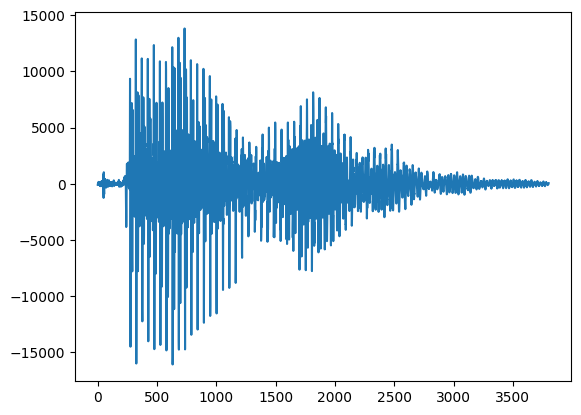

In [10]:
wavPlayer("free-spoken-digit-dataset-master/recordings/5_george_4.wav")

In [11]:
data_tf.shape

(3000, 1025)

In [12]:
X = df[[x for x in df.columns if x != "target"]]
y = df["target"]

In [13]:
y.value_counts()

target
5    300
3    300
8    300
7    300
0    300
6    300
2    300
9    300
4    300
1    300
Name: count, dtype: int64

### Separación de sets

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

## Modelado

### Bosque Aleatorio

#### Modelado

In [15]:
RandomForestClassifier?

Init signature:
RandomForestClassifier(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
    monotonic_cst=None,
)
Docstring:     
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
Trees in the forest use the best split strategy, i.e. equivalent to passing
`splitter="best"` to the underlying :class:`~sklearn.tree.DecisionTreeClassifier`.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the

In [16]:
bos = RandomForestClassifier(n_estimators=100, max_depth=5)

In [17]:
bos.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


#### Cross-validation

In [18]:
classification_metrics(X=X_train, y=y_train, estimator=bos)

Accuracy media: 0.65, desviación estándar: 0.005315741780415685


#### Hyperparametrización

In [19]:
param_dict = {"n_estimators": [x for x in range(100, 1500, 100)],
              "max_features": ["auto", "sqrt", "log2"],
              "criterion": ["gini", "entropy"],
              "class_weight": ["balanced", None],
              "min_samples_split": [x for x in range(2, 50, 2)],
              "min_samples_leaf": [x/100 for x in range(5, 55, 5)]}

In [20]:
search = RandomizedSearchCV(param_distributions=param_dict, cv=4, n_jobs=-1, scoring="accuracy", estimator=bos, verbose=5,n_iter=10) #,n_iter=100

In [21]:
search.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


/home/angelicaleon/.local/share/virtualenvs/clases-nMuhLpWQ/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:516: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/home/angelicaleon/.local/share/virtualenvs/clases-nMuhLpWQ/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/angelicaleon/.local/share/virtualenvs/clases-nMuhLpWQ/lib/python3.10/site-packages/sklearn/base.py", line 1356, in wrapper
    estimator._validate_params()
  File "/home/angelicaleon/.local/share/virtuale

,estimator,RandomForestC...r(max_depth=5)
,param_distributions,"{'class_weight': ['balanced', None], 'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'sqrt', ...], 'min_samples_leaf': [0.05, 0.1, ...], ...}"
,n_iter,10
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,4
,verbose,5
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [22]:
search.best_estimator_

,n_estimators,400
,criterion,'gini'
,max_depth,5
,min_samples_split,44
,min_samples_leaf,0.15
,min_weight_fraction_leaf,0.0
,max_features,'log2'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [23]:
search.best_score_

np.float64(0.36843880963066444)

### AdaBoost

#### Modelado

In [24]:
AdaBoostClassifier?

Init signature:
AdaBoostClassifier(
    estimator=None,
    *,
    n_estimators=50,
    learning_rate=1.0,
    algorithm='deprecated',
    random_state=None,
)
Docstring:     
An AdaBoost classifier.

An AdaBoost [1]_ classifier is a meta-estimator that begins by fitting a
classifier on the original dataset and then fits additional copies of the
classifier on the same dataset but where the weights of incorrectly
classified instances are adjusted such that subsequent classifiers focus
more on difficult cases.

This class implements the algorithm based on [2]_.

Read more in the :ref:`User Guide <adaboost>`.

.. versionadded:: 0.14

Parameters
----------
estimator : object, default=None
    The base estimator from which the boosted ensemble is built.
    Support for sample weighting is required, as well as proper
    ``classes_`` and ``n_classes_`` attributes. If ``None``, then
    the base estimator is :class:`~sklearn.tree.DecisionTreeClassifier`
    initialized with `max_depth=1`.

  

In [25]:
ada = AdaBoostClassifier(n_estimators=100, learning_rate=0.05)

#### Cross-validation

In [26]:
classification_metrics(X=X_train, y=y_train, estimator=ada)

Accuracy media: 0.19, desviación estándar: 0.014372115152432578


#### Hyperparametrización

In [27]:
search_grid={'n_estimators':[50,100,200],
             'learning_rate':[.001,0.01,.1]}

In [28]:
search = RandomizedSearchCV(param_distributions=search_grid, cv=4, n_jobs=-1, scoring="accuracy", estimator=ada, verbose=5,n_iter=9)

In [29]:
search.fit(X_train, y_train)

Fitting 4 folds for each of 9 candidates, totalling 36 fits


,estimator,AdaBoostClass...stimators=100)
,param_distributions,"{'learning_rate': [0.001, 0.01, ...], 'n_estimators': [50, 100, ...]}"
,n_iter,9
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,4
,verbose,5
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [30]:
search.best_estimator_

,estimator,None
,n_estimators,200
,learning_rate,0.1
,algorithm,'deprecated'
,random_state,None


In [31]:
search.best_score_

np.float64(0.27467636517638727)

### Gradient Boosting

#### Modelado

In [32]:
GradientBoostingClassifier?

Init signature:
GradientBoostingClassifier(
    *,
    loss='log_loss',
    learning_rate=0.1,
    n_estimators=100,
    subsample=1.0,
    criterion='friedman_mse',
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_depth=3,
    min_impurity_decrease=0.0,
    init=None,
    random_state=None,
    max_features=None,
    verbose=0,
    max_leaf_nodes=None,
    warm_start=False,
    validation_fraction=0.1,
    n_iter_no_change=None,
    tol=0.0001,
    ccp_alpha=0.0,
)
Docstring:     
Gradient Boosting for classification.

This algorithm builds an additive model in a forward stage-wise fashion; it
allows for the optimization of arbitrary differentiable loss functions. In
each stage ``n_classes_`` regression trees are fit on the negative gradient
of the loss function, e.g. binary or multiclass log loss. Binary
classification is a special case where only a single regression tree is
induced.

:class:`~sklearn.ensemble.HistGradientBoostingClassifier` 

In [33]:
gb = GradientBoostingClassifier(learning_rate=0.05, min_samples_leaf=0.05)

#### Cross-validation

In [34]:
classification_metrics(X=X_train, y=y_train, estimator=gb)

[CV 4/4] END class_weight=None, criterion=entropy, max_features=auto, min_samples_leaf=0.35, min_samples_split=26, n_estimators=400;, score=nan total time=   0.0s
[CV 1/4] END class_weight=None, criterion=entropy, max_features=auto, min_samples_leaf=0.4, min_samples_split=8, n_estimators=900;, score=nan total time=   0.0s
[CV 2/4] END class_weight=None, criterion=entropy, max_features=auto, min_samples_leaf=0.4, min_samples_split=8, n_estimators=900;, score=nan total time=   0.0s
[CV 3/4] END class_weight=None, criterion=entropy, max_features=auto, min_samples_leaf=0.4, min_samples_split=8, n_estimators=900;, score=nan total time=   0.0s
[CV 4/4] END class_weight=None, criterion=entropy, max_features=auto, min_samples_leaf=0.4, min_samples_split=8, n_estimators=900;, score=nan total time=   0.0s
[CV 1/4] END class_weight=None, criterion=gini, max_features=log2, min_samples_leaf=0.15, min_samples_split=44, n_estimators=400;, score=0.366 total time=   3.4s
[CV 2/4] END learning_rate=0.00

### Voting

#### Modelado

In [35]:
#VotingClassifier?

In [36]:
naiveb = GaussianNB()
logreg = LogisticRegression()
dctree = DecisionTreeClassifier()

#### Soft-voting

##### Cross-validation

In [37]:
vc = VotingClassifier(estimators=[("logreg", logreg), ("arbol", dctree), ("bayes", naiveb)], voting='soft')

In [38]:
classification_metrics(X=X_train, y=y_train, estimator=vc)

/home/angelicaleon/.local/share/virtualenvs/clases-nMuhLpWQ/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/angelicaleon/.local/share/virtualenvs/clases-nMuhLpWQ/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the dat

Accuracy media: 0.65, desviación estándar: 0.025364360427403105


#### Hard-voting

##### Cross-validation

In [39]:
vc = VotingClassifier(estimators=[("logreg", logreg), ("arbol", dctree), ("bayes", naiveb)], voting='hard')

In [40]:
classification_metrics(X=X_train, y=y_train, estimator=vc)

/home/angelicaleon/.local/share/virtualenvs/clases-nMuhLpWQ/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/angelicaleon/.local/share/virtualenvs/clases-nMuhLpWQ/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the dat

Accuracy media: 0.65, desviación estándar: 0.021742490424120603


### XGBoost

#### Modelado

In [41]:
xgb = XGBClassifier(learning_rate=0.1, n_estimators=190, max_depth=5, min_child_weight=2, objective="binary:logistic", subsample=0.9, colsample_bytree=0.8, seed=23333)

In [42]:
xgb.fit(X_train, y_train.astype(int))

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


#### Cross-validation

In [43]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1016,1017,1018,1019,1020,1021,1022,1023,1024,target
0,0.000565,0.003579,0.003639,0.016024,0.032863,0.015742,0.003075,0.050619,0.099348,0.057171,...,0.002030,0.000928,0.000118,0.003116,0.006072,0.003172,0.000117,0.002119,0.004278,5
1,5.874355,3.139719,0.148617,0.097738,0.022533,0.110199,0.026172,0.054632,0.027571,0.033736,...,0.119835,0.073610,0.009693,0.113281,0.205766,0.098784,0.002619,0.138918,0.277147,3
2,0.023058,0.012269,0.000946,0.000670,0.000738,0.000235,0.000048,0.000141,0.000441,0.000335,...,0.000476,0.000504,0.000239,0.001006,0.001471,0.000896,0.000254,0.000257,0.000046,8
3,0.016852,0.009800,0.001384,0.000479,0.003757,0.004749,0.001719,0.002732,0.006714,0.004931,...,0.007798,0.003517,0.000972,0.005799,0.010424,0.005106,0.001088,0.002361,0.003996,8
4,6.526481,3.450956,0.261977,0.183364,0.114185,0.076256,0.055764,0.093586,0.069057,0.040122,...,0.067217,0.052931,0.009424,0.047746,0.077153,0.049546,0.016806,0.024954,0.057222,7


In [44]:
classification_metrics(estimator=xgb, X = X_train, y=y_train.astype(int))

Accuracy media: 0.87, desviación estándar: 0.016298470004129074


In [45]:
xgb.score(X_test, y_test.astype(int))

0.88

### Análisis de resultados

In [46]:
df["pred"] = xgb.predict(X)

In [47]:
xgb.predict(X)

array([1, 3, 8, ..., 8, 4, 8], shape=(3000,))

In [48]:
df["target"].unique()

array(['5', '3', '8', '7', '0', '6', '2', '9', '4', '1'], dtype=object)

In [49]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1017,1018,1019,1020,1021,1022,1023,1024,target,pred
0,0.000565,0.003579,0.003639,0.016024,0.032863,0.015742,0.003075,0.050619,0.099348,0.057171,...,0.000928,0.000118,0.003116,0.006072,0.003172,0.000117,0.002119,0.004278,5,1
1,5.874355,3.139719,0.148617,0.097738,0.022533,0.110199,0.026172,0.054632,0.027571,0.033736,...,0.073610,0.009693,0.113281,0.205766,0.098784,0.002619,0.138918,0.277147,3,3
2,0.023058,0.012269,0.000946,0.000670,0.000738,0.000235,0.000048,0.000141,0.000441,0.000335,...,0.000504,0.000239,0.001006,0.001471,0.000896,0.000254,0.000257,0.000046,8,8
3,0.016852,0.009800,0.001384,0.000479,0.003757,0.004749,0.001719,0.002732,0.006714,0.004931,...,0.003517,0.000972,0.005799,0.010424,0.005106,0.001088,0.002361,0.003996,8,8
4,6.526481,3.450956,0.261977,0.183364,0.114185,0.076256,0.055764,0.093586,0.069057,0.040122,...,0.052931,0.009424,0.047746,0.077153,0.049546,0.016806,0.024954,0.057222,7,7


In [50]:
df.loc[df["target"] == '1', "target"]

31      1
37      1
43      1
45      1
49      1
       ..
2961    1
2964    1
2966    1
2979    1
2981    1
Name: target, Length: 300, dtype: object

In [51]:
df.loc[df["target"] == '1', "pred"]

31      1
37      1
43      1
45      1
49      1
       ..
2961    1
2964    1
2966    1
2979    4
2981    1
Name: pred, Length: 300, dtype: int64

In [52]:
for num in sorted(df["target"].unique()):
    print(num, accuracy_score(y_true=df.loc[df["target"] == num, "target"].astype(int), y_pred=df.loc[df["target"] == num, "pred"].astype(int)))

0 0.9633333333333334
1 0.9633333333333334
2 0.9666666666666667
3 0.9666666666666667
4 0.99
5 0.97
6 0.9466666666666667
7 0.9933333333333333
8 0.9833333333333333
9 0.9566666666666667


In [53]:
accuracy_score(y_true=df["target"].astype(int), y_pred=df["pred"].astype(int))

0.97

### Validación con datos reales

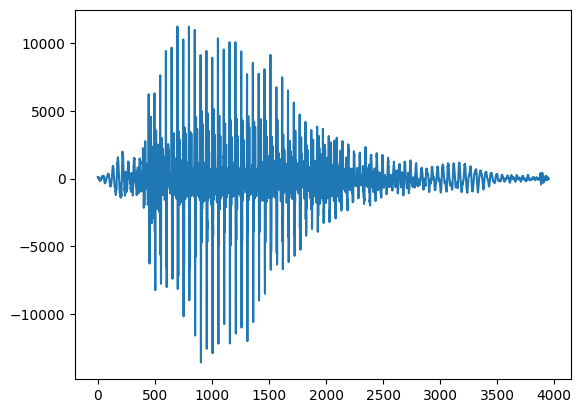

In [63]:
wavPlayer("free-spoken-digit-dataset-master/recordings/9_george_4.wav")

The real is: 9
The predicted is: 9


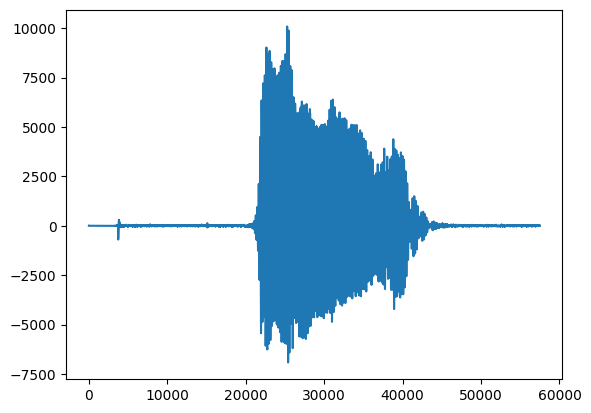

In [64]:
predict_number(filepath='9_angelica_0.wav', estimator=xgb, features=X_train.columns)

In [65]:
gb

,loss,'log_loss'
,learning_rate,0.05
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,0.05
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [66]:
gb.fit(X_train,y_train)

KeyboardInterrupt: 

In [ ]:
predict_number(filepath='/home/pc1/venvs/clases/DiplomadoCienciaDeDatos/Modulo2/Ensambles/free-spoken-digit-dataset-master/acquire_data/9_angelica_0.wav', estimator=gb, features=X_train.columns)